In [1]:
import cv2
from pytesseract import pytesseract
import numpy as np
import matplotlib.image as mpimg
import os
import glob, random
import matplotlib.pyplot as plt

home_directory = os.getcwd()


## CÓMO MEJORAR LOS OUTPUTS DE TESSERACT:
# https://tesseract-ocr.github.io/tessdoc/ImproveQuality.html

In [173]:
## En caso de tener que pasar el pdf a png:

''' 

()

'''

' \n\n()\n\n'

/home/rcruz/PycharmProjects/ocr/crops/8_12.tar_1601.05676.gz_ms_3_ori__equation.png
Clase: equation
--------------------------------------------------
 

Figure 2. SIX-flux vs LAT-flux
extragalactic associated sources. Colo
coding: light green are blazars, dark greet
are TeV blazars, purple are non-blazars, rec
ae Se a

 

 

 



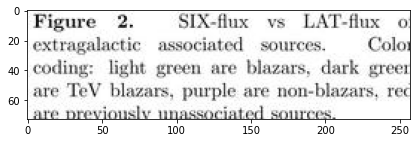

/home/rcruz/PycharmProjects/ocr/crops/4_101.tar_1506.08915.gz_2016-Bayesian_Optimal_Sequential_Multi-Hypothesis_Testing_in_Exponential_Families_15_ori__reference.png
Clase: reference
--------------------------------------------------
Example 4: adaptive sample size



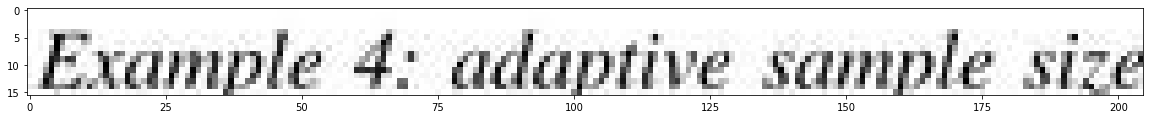

/home/rcruz/PycharmProjects/ocr/crops/7_105.tar_1507.02264.gz_DMDNoiseArXivPlain_v3_6_ori__list.png
Clase: list
--------------------------------------------------
 



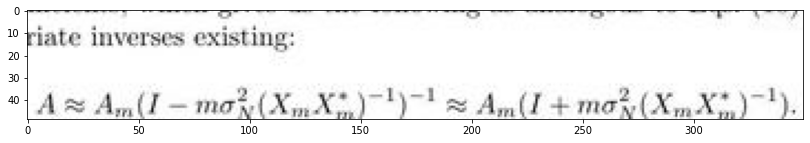

In [165]:
## Cogemos un crop random para hacer el OCR

'''
Lo ideal sería almacenar este texto en archivos json que se organicen en DynamoDB de AWS,
con campos que se hayan inferido del recuadro de la anotación, la clasificación del documento,
y el tipo de información contenida en el propio texto
'''

file_path_type = [home_directory+"/crops/*.png"]
for i in range(3):   
    images = glob.glob(random.choice(file_path_type))
    random_image = random.choice(images)
    
    clase = random_image.split('__')[-1].split('.png')[0]
    
    print(random_image)
    print('Clase: ' + clase)
    print('-'*50)
    
    ## La leemeos en blanco y negro
    image = cv2.imread(random_image, cv2.IMREAD_GRAYSCALE)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    ## Aquí pondríamos condicionales para, por ejemplo, extraer el crop de la firma directamente
    ## sin pasarla por OCR
    ## Ejemplo:
    
    '''
    if clase == 'firma':
         mpimg.imsave(home_directory + '/firmas/firma_Nombre.png', image)
    '''
    
    
    # usamos Tesseract para el OCR de la imagen
    text = pytesseract.image_to_string(image)
    print(text)
    plt.figure(figsize = (20,2))
    plt.imshow(image)
    plt.show()


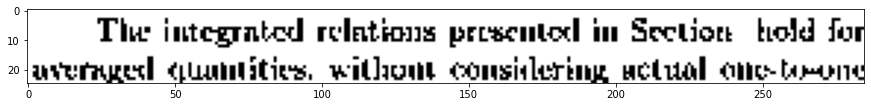

‘The integrated relations presented in Section held for
averared quantities. wilhows consileriae actual one-to-one



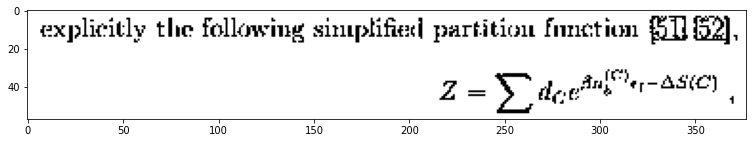

explicitly the following simplified partition fnction 1) 52),
Za Tray raser,



In [172]:
## Intentemos mejorar la lectura de los caracteres
## aplicando filtros a las imágenes

lista_a_mejorar = ['/home/rcruz/PycharmProjects/ocr/crops/9_10.tar_1601.04660.gz_civ_15_ori__paragraph.png',
                   '/home/rcruz/PycharmProjects/ocr/crops/6_101.tar_1408.2391.gz_BridgingCollapse3_6_ori__paragraph.png'            
                   ]

for img_mejora in lista_a_mejorar:

    img = cv2.imread(img_mejora, cv2.IMREAD_GRAYSCALE)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   
        
    ret, img = cv2.threshold(img, 190, 255, cv2.THRESH_BINARY)

    # ret, img = cv2.threshold(img, 150, 255,cv2.THRESH_TOZERO)
    
    
    kernel = np.ones((1,1),np.uint8)
    img = cv2.erode(img,kernel,iterations = 3)

    img = cv2.dilate(img, kernel, iterations=3)


    plt.figure(figsize = (15,2))
    plt.imshow(img)
    plt.show()

    text = pytesseract.image_to_string(img, lang='eng', config='--psm 6')
    print(text)